In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Styling configuration
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)

# Loading the data
file_path = 'C:\\Users\\SC\\Desktop\\WINHMS Data Mining\\Data\\Country Wise Dec.xls'
cols = ['Empty', 'Country', 'Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
df_country = pd.read_excel(file_path, skiprows=4, names=cols)

# Data Cleaning
df_country = df_country.drop(columns=['Empty']).dropna(subset=['Country'])
df_country = df_country[~df_country['Country'].str.contains('Total|Grand Total', case=False, na=False)]

# Numeric conversion
numeric_cols = ['Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
for col in numeric_cols:
    df_country[col] = pd.to_numeric(df_country[col], errors='coerce').fillna(0)

# Filter out non-contributing entries
df_active = df_country[df_country['Room_Revenue'] > 0].copy()
print(f"Dataset ready: {len(df_active)} countries analyzed.")

Dataset ready: 20 countries analyzed.


C:\Users\SC\AppData\Local\Temp\ipykernel_17604\1044040530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_rev_country, x='Room_Revenue', y='Country', palette='rocket')


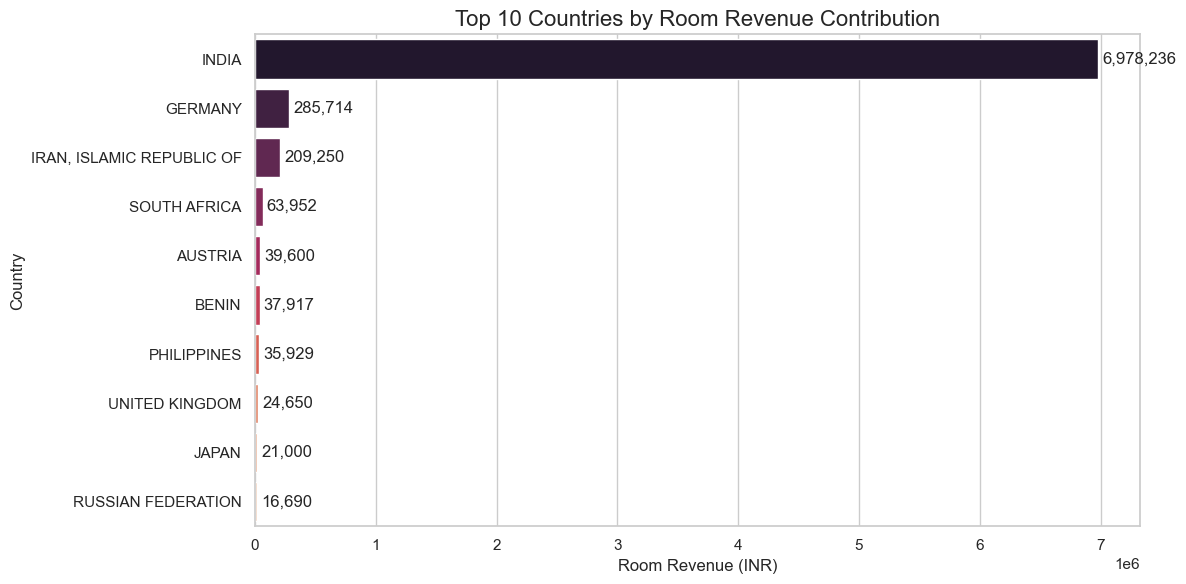

In [4]:
# Sort by Room Revenue
top_rev_country = df_active.sort_values(by='Room_Revenue', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_rev_country, x='Room_Revenue', y='Country', palette='rocket')
plt.title('Top 10 Countries by Room Revenue Contribution', fontsize=16)
plt.xlabel('Room Revenue (INR)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Adding value labels
for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()


#### --- INSIGHTS ---
#### 1. DOMESTIC DOMINANCE: India is the primary revenue driver, contributing the vast majority of total income.
#### 2. KEY INTERNATIONAL MARKETS: Germany and the USA appear as the leading international revenue sources.
#### 3. REVENUE CONCENTRATION: There is a steep drop-off after India, indicating a heavy reliance on the domestic market for this period.

C:\Users\SC\AppData\Local\Temp\ipykernel_17604\2539197735.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_nights_country, x='Nights', y='Country', palette='mako')


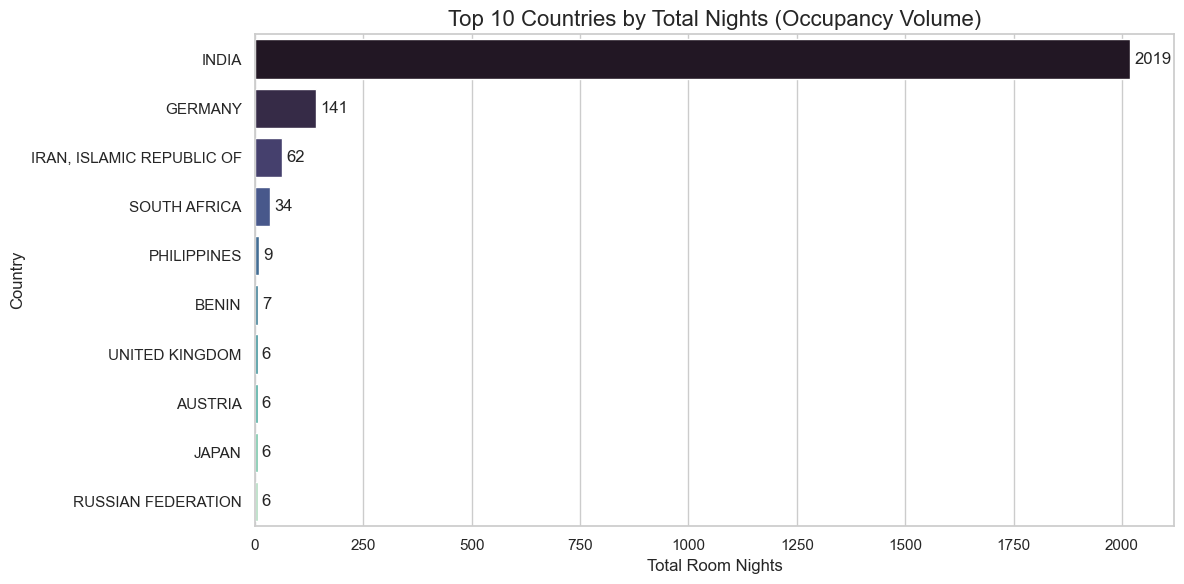

In [6]:
# Sort by Nights
top_nights_country = df_active.sort_values(by='Nights', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_nights_country, x='Nights', y='Country', palette='mako')
plt.title('Top 10 Countries by Total Nights (Occupancy Volume)', fontsize=16)
plt.xlabel('Total Room Nights', fontsize=12)
plt.ylabel('Country', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. VOLUME SOURCE: India accounts for nearly 2,019 nights, suggesting the hotel is a preferred choice for local travelers/corporate stays.
#### 2. STABLE INTERNATIONAL FOOTPRINT: Germany (141 nights) and United Kingdom (34 nights) show consistent stays.
#### 3. STRATEGIC TARGETS: Countries like Germany provide a significant volume of nights, which helps maintain base occupancy outside of domestic demand.

C:\Users\SC\AppData\Local\Temp\ipykernel_17604\1033802308.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_arr_country, x='ARR', y='Country', palette='flare')


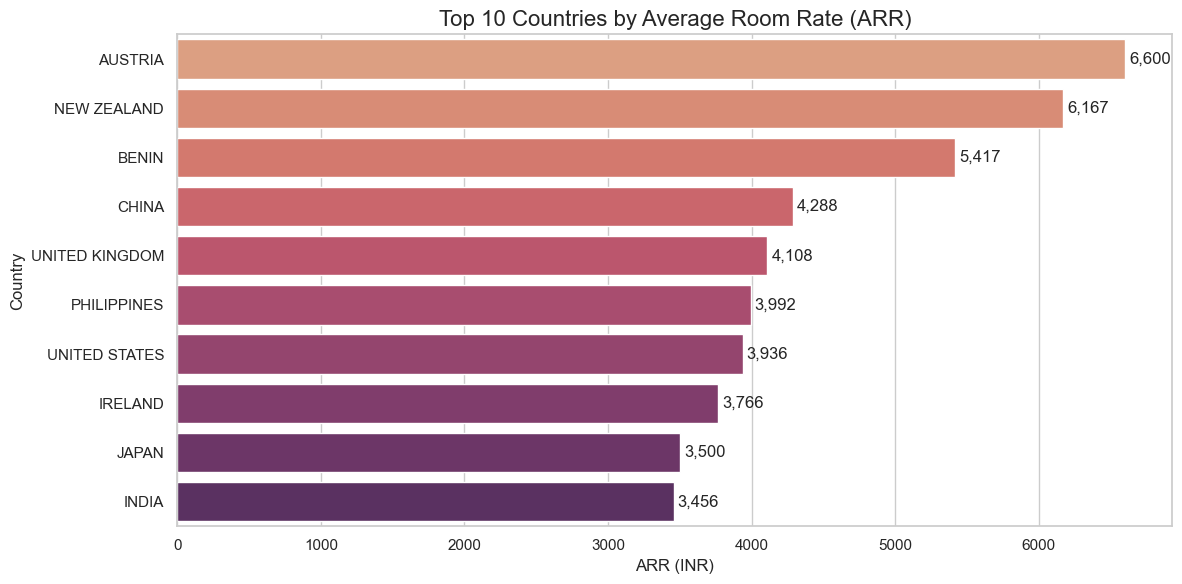

In [7]:
# Sort by ARR to see which country pays the highest rate on average
top_arr_country = df_active.sort_values(by='ARR', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_arr_country, x='ARR', y='Country', palette='flare')
plt.title('Top 10 Countries by Average Room Rate (ARR)', fontsize=16)
plt.xlabel('ARR (INR)', fontsize=12)
plt.ylabel('Country', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. PREMIUM SEGMENTS: Interestingly, smaller markets like Austria and Benin have very high ARRs (>5,000 INR). 
#### 2. RATE DISPARITY: While India provides the most volume, its ARR (~3,456 INR) is mid-range compared to some international segments.
#### 3. OPPORTUNITY: There may be an opportunity to target more travelers from high-ARR countries (Austria, Benin) to increase the overall average rate.

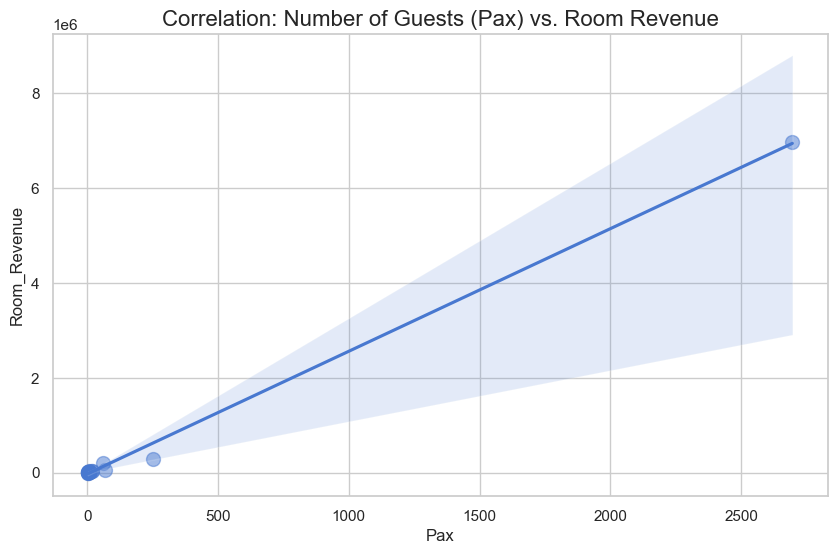

In [9]:
# Relationship between Pax and Revenue
plt.figure(figsize=(10, 6))
sns.regplot(data=df_active, x='Pax', y='Room_Revenue', scatter_kws={'s':100, 'alpha':0.5})
plt.title('Correlation: Number of Guests (Pax) vs. Room Revenue', fontsize=16)
plt.show()

#### --- INSIGHTS ---
#### 1. STRONG CORRELATION: As expected, there is a direct linear relationship between the number of guests and revenue.
#### 2. EFFICIENCY: The steepness of the line indicates the average revenue generated per guest across all countries.

In [10]:
# Summary metrics
total_rev = df_active['Room_Revenue'].sum()
india_rev_share = (df_active[df_active['Country'] == 'INDIA']['Room_Revenue'].sum() / total_rev) * 100

print(f"Total Revenue for Dec: INR {total_rev:,.2f}")
print(f"India Revenue Share: {india_rev_share:.2f}%")
print(f"International Revenue Share: {100 - india_rev_share:.2f}%")

# Create a final summary table
summary_table = df_active[['Country', 'Nights', 'Room_Revenue', 'ARR', 'Revenue_Pct']].sort_values(by='Room_Revenue', ascending=False)
summary_table.to_csv('Country_Insight_Summary.csv', index=False)
summary_table.head(10)

Total Revenue for Dec: INR 7,785,888.46
India Revenue Share: 89.63%
International Revenue Share: 10.37%


,Country,Nights,Room_Revenue,ARR,Revenue_Pct
5,INDIA,2019.0,6978235.78,3456.28,89.63
3,GERMANY,141.0,285713.60,2026.34,3.67
7,"IRAN, ISLAMIC REPUBLIC OF",62.0,209250.00,3375.00,2.69
16,SOUTH AFRICA,34.0,63952.30,1880.95,0.82
0,AUSTRIA,6.0,39599.87,6599.98,0.51
1,BENIN,7.0,37916.62,5416.66,0.49
13,PHILIPPINES,9.0,35928.56,3992.06,0.46
19,UNITED KINGDOM,6.0,24649.89,4108.32,0.32
10,JAPAN,6.0,21000.00,3500.00,0.27
14,RUSSIAN FEDERATION,6.0,16690.47,2781.75,0.21


#### Summary of Insights:
#### 1. Market Concentration: India is your "bread and butter" market, contributing roughly 89.6% of your total revenue. Any shift in domestic demand will significantly impact the hotel's performance.

#### 2. International Powerhouse: Germany is the standout international market, not just in revenue but in volume (141 nights). It represents a stable pillar for international business.

#### 3. Yield Opportunity: Countries like Austria and Benin show much higher Average Room Rates (ARR) than the domestic average. Marketing efforts targeting these specific regions could yield higher profit margins per room sold.

#### 4. Occupancy Driver: While India fills the most rooms, the data suggests that international guests (United Kingdom, USA) are staying for multiple nights or in larger groups, contributing to the "Pax" (Guest) count significantly.